In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# yahoo googleから株価をダウンロード（米国のみ）
import pandas_datareader as pdr

In [4]:
from datetime import datetime

In [5]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [6]:
# 3年前から現在まで
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [7]:
for stock in tech_list:
    # プログラムのコードを変数で置き換える
    globals()[stock] = pdr.DataReader(stock, 'yahoo', start, end)

In [8]:
# tech_list がそれぞれデータフレームになる
type(AAPL)
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-09,77.607498,76.550003,76.809998,77.407501,170108400.0,76.744728
2020-01-10,78.167503,77.062500,77.650002,77.582497,140644800.0,76.918221
2020-01-13,79.267502,77.787498,77.910004,79.239998,121532000.0,78.561531
2020-01-14,79.392502,78.042503,79.175003,78.169998,161954400.0,77.500702
2020-01-15,78.875000,77.387497,77.962502,77.834999,121923600.0,77.168564


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-01-09 to 2021-01-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


- open　取引開始時の価格
- close　取引終了時の価格
- high　最大値
- row　　最小値
- volume　取引数（出来高）
- adj close　調整した終値

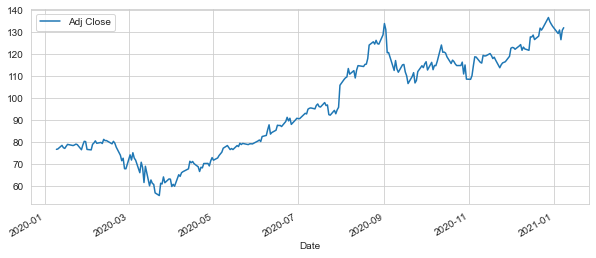

In [10]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

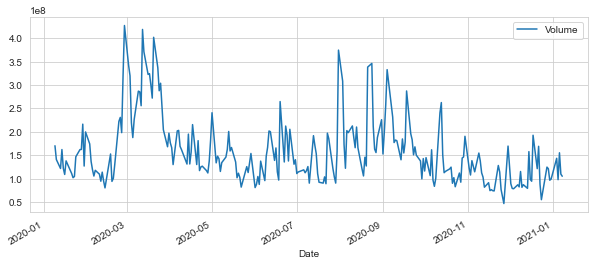

In [11]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

## 移動平均線
10日移動平均や20日移動平均など

In [12]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = 'MA {}'.format(ma)
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

In [13]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50
Date,,,,,,,,,
2020-01-09,77.607498,76.550003,76.809998,77.407501,170108400.0,76.744728,NaN,NaN,NaN
2020-01-10,78.167503,77.062500,77.650002,77.582497,140644800.0,76.918221,NaN,NaN,NaN
2020-01-13,79.267502,77.787498,77.910004,79.239998,121532000.0,78.561531,NaN,NaN,NaN
2020-01-14,79.392502,78.042503,79.175003,78.169998,161954400.0,77.500702,NaN,NaN,NaN
2020-01-15,78.875000,77.387497,77.962502,77.834999,121923600.0,77.168564,NaN,NaN,NaN


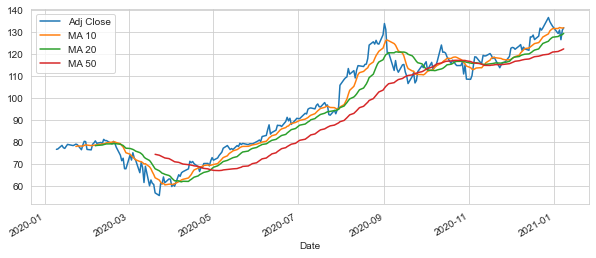

In [14]:
AAPL[['Adj Close','MA 10','MA 20','MA 50']].plot(subplots=False,figsize=(10,4))

In [24]:
# 日ごとの終値を比較して、何％変化したか？
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [25]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50,Deily Rrturn,Deily Return,Daily Return
Date,,,,,,,,,,,,
2020-01-09,77.607498,76.550003,76.809998,77.407501,170108400.0,76.744728,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-10,78.167503,77.062500,77.650002,77.582497,140644800.0,76.918221,NaN,NaN,NaN,0.002261,0.002261,0.002261
2020-01-13,79.267502,77.787498,77.910004,79.239998,121532000.0,78.561531,NaN,NaN,NaN,0.021364,0.021364,0.021364
2020-01-14,79.392502,78.042503,79.175003,78.169998,161954400.0,77.500702,NaN,NaN,NaN,-0.013503,-0.013503,-0.013503
2020-01-15,78.875000,77.387497,77.962502,77.834999,121923600.0,77.168564,NaN,NaN,NaN,-0.004286,-0.004286,-0.004286


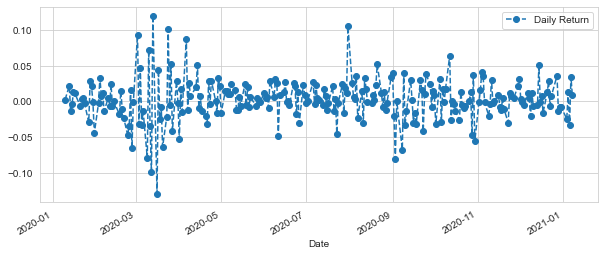

In [27]:
# 前日に比べてどれくらい変化したか？
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

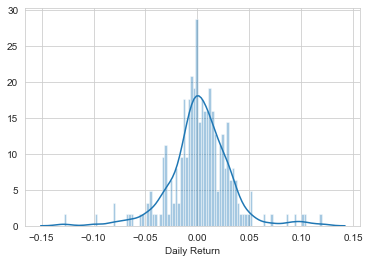

In [29]:
# ヒストグラム　１年間でどれくらいの変動の分布になっているのか？
sns.distplot(AAPL['Daily Return'].dropna(),bins=100)

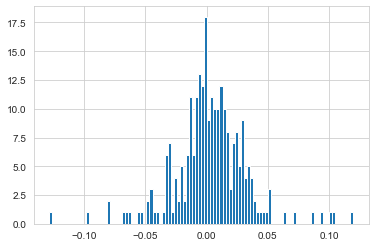

In [31]:
# ただのヒストグラム
AAPL['Daily Return'].hist(bins=100)

### 他の会社の株価も一緒に扱う

In [32]:
closing_df = pdr.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [36]:
# 4社のそれぞれの株価
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-01-09,76.744728,1419.829956,160.390869,1901.050049
2020-01-10,76.918221,1429.729980,159.648727,1883.160034
2020-01-13,78.561531,1439.229980,161.568405,1891.300049
2020-01-14,77.500702,1430.880005,160.430450,1869.439941
2020-01-15,77.168564,1439.199951,161.469452,1862.020020


In [37]:
# 1日の変化率
tech_rets = closing_df.pct_change()

In [38]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-01-09,NaN,NaN,NaN,NaN
2020-01-10,0.002261,0.006973,-0.004627,-0.009411
2020-01-13,0.021364,0.006645,0.012024,0.004323
2020-01-14,-0.013503,-0.005802,-0.007043,-0.011558
2020-01-15,-0.004286,0.005815,0.006476,-0.003969


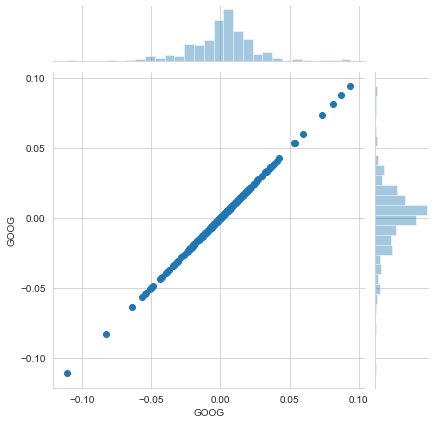

In [40]:
# 会社同士で比較
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter')

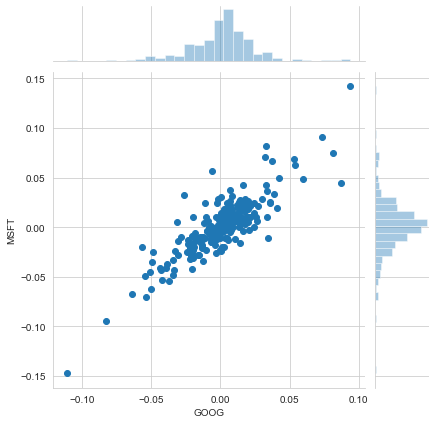

In [41]:
# 会社同士で比較
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

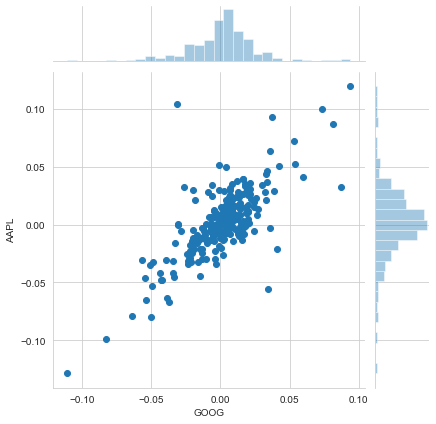

In [42]:
sns.jointplot('GOOG','AAPL',tech_rets,kind='scatter')

ピアソンの相関係数

では、現在４社のデータを取り込んでいるが、全ての企業を対応させて比較させるにはどうするか？

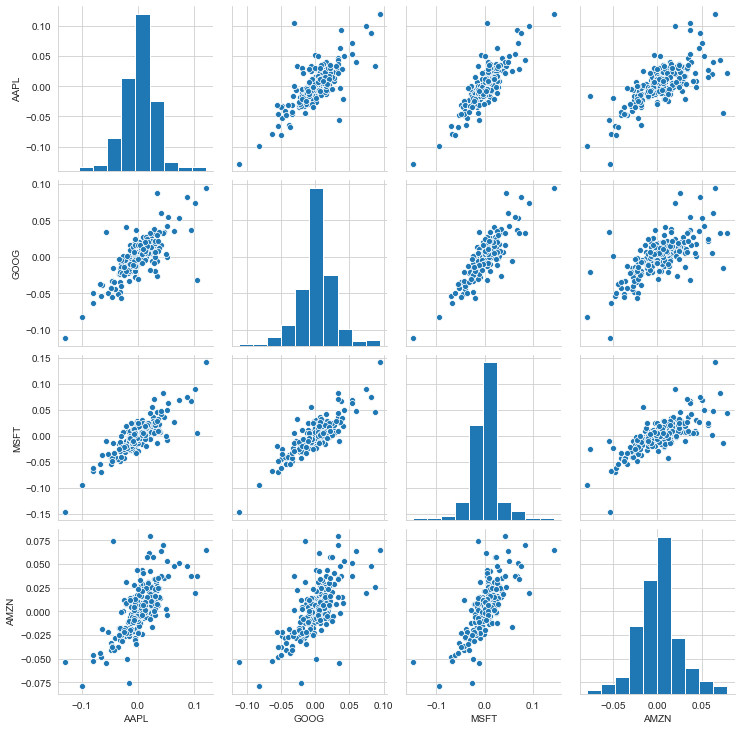

In [43]:
sns.pairplot(tech_rets.dropna())

'\n対角線上はヒストグラム\n右上部はスキャッタープロット\n左下部はカーネル密度推定\n'

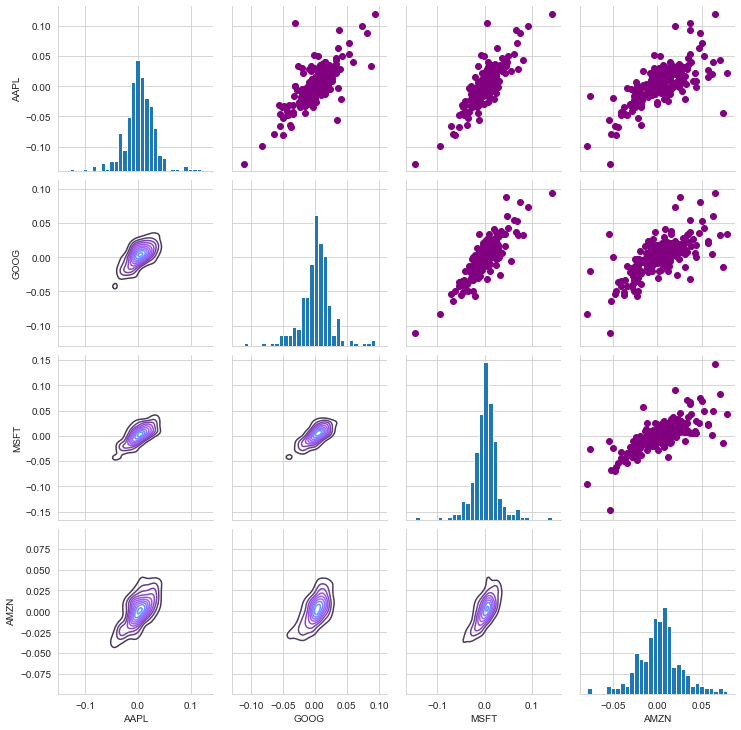

In [48]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

'''
対角線上はヒストグラム
右上部はスキャッタープロット
左下部はカーネル密度推定
'''

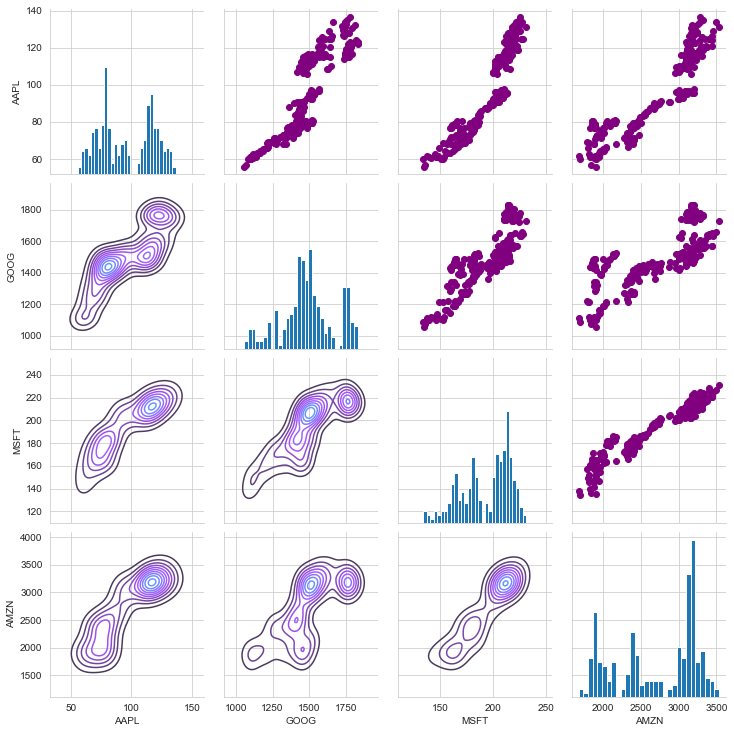

In [49]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

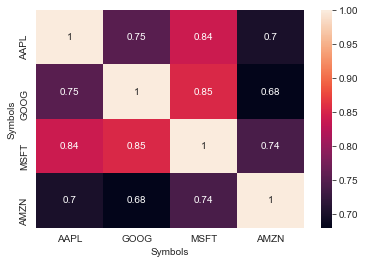

In [51]:
# 相関係数を数字で求めたい　→　ヒートマップで可視化する
sns.heatmap(tech_rets.corr(), annot=True)

## リスク解析

In [58]:
# リスクとリターンを可視化する
rets = tech_rets.dropna()

In [59]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-01-10,0.002261,0.006973,-0.004627,-0.009411
2020-01-13,0.021364,0.006645,0.012024,0.004323
2020-01-14,-0.013503,-0.005802,-0.007043,-0.011558
2020-01-15,-0.004286,0.005815,0.006476,-0.003969
2020-01-16,0.012527,0.008685,0.018323,0.008550


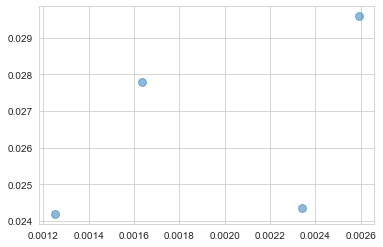

In [65]:
plt.scatter(rets.mean(), rets.std(),alpha=0.5, s = np.pi*20)

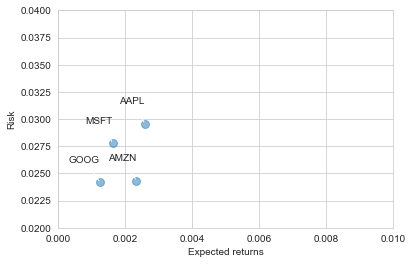

In [75]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

plt.ylim([0.02,0.04])
plt.xlim([0,0.01])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# グラフにアノテーションを付けます。詳しくは、以下を参照してみてください。
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (0, 20),
        textcoords = 'offset points', ha = 'right',
        arrowprops = dict(arrowstyle='-', connectionstyle= 'arc3'))
# Riskが高い　→　変動幅が大きい

#### Value at Risk

ある一定の確率で、資産がどれくらい減ってしまう可能性があるのかを見積もる方法に、Value at Risk（VaR）という考え方があります。このValue at Riskの計算方法にもいくつかの方法がありますが、ここではまず、Value at Riskの考え方から説明し、実際に数字を見積もってみます。

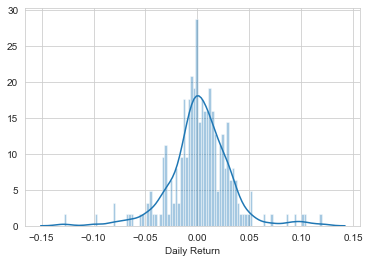

In [78]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100)

In [79]:
rets['AAPL'].quantile(0.05)

-0.04486866478075284

In [81]:
## 1年後のリスクを予測する
days = 365
dt = 1/days
mu = rets.mean()['GOOG'] # googleの平均値
sigma = rets.std()['GOOG'] # googleのstd

In [90]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
    return price

In [91]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-09,1427.329956,1410.270020,1420.569946,1419.829956,1500900,1419.829956
2020-01-10,1434.928955,1418.349976,1427.560059,1429.729980,1820700,1429.729980
2020-01-13,1440.520020,1426.020020,1436.130005,1439.229980,1652300,1439.229980
2020-01-14,1441.800049,1428.369995,1439.010010,1430.880005,1558900,1430.880005
2020-01-15,1441.395020,1430.209961,1430.209961,1439.199951,1282700,1439.199951


Text(0.5, 1.0, 'Monte CarloAnalysis')

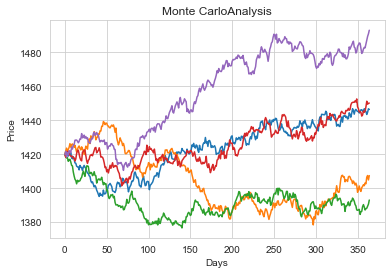

In [92]:
start_price = GOOG.iloc[0,5]

for run in range(5):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte CarloAnalysis')

1年後の株価を予測している（モンテカルロシミュレーション）
本当の株価のような動きを見せているが、乱数でモデリングしているだけ

これを使用して、1年後のvalue at riskを見積もる

In [94]:
runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

(array([2., 0., 1., ..., 0., 0., 1.]),
 array([1315.53685815, 1316.67520297, 1317.81354779, ..., 1540.9291329 ,
        1542.06747772, 1543.20582254]),
 <a list of 200 Patch objects>)

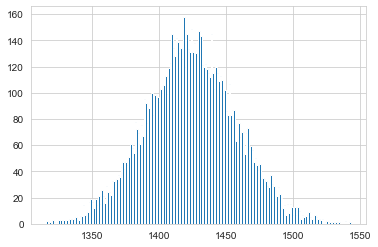

In [95]:
plt.hist(simulations,bins=200)

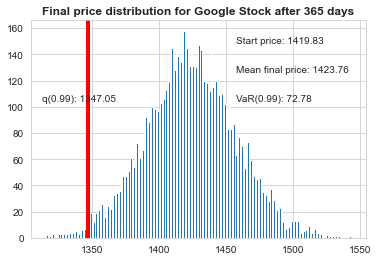

In [99]:
# 最終的な株価のヒストグラムを表示します。
plt.hist(simulations,bins=200)

# 1パーセンタイルの位置を設定します。
q = np.percentile(simulations, 1)

# プロットに追加的な情報を載せます。

# 最初の株価
plt.figtext(0.6, 0.8, s="Start price: {:0.2f}".format(start_price))
# 最終的な株価の平均値
plt.figtext(0.6, 0.7, "Mean final price: {:0.2f}".format(simulations.mean()))

# Value at Risk (信頼区間99%）
plt.figtext(0.6, 0.6, "VaR(0.99): {:0.2f}".format(start_price - q))

# 1パーセンタイル
plt.figtext(0.15, 0.6, "q(0.99): {:0.2f}".format(q))

# 1% クォンタイルに線を描きます
plt.axvline(x=q, linewidth=4, color='r')

# タイトル
plt.title("Final price distribution for Google Stock after {} days".format(days), weight='bold');


シミュレーションで、グーグルの株価のVaRを計算することができました。1年という期間、99%の信頼区間でのVaRは、1株（526.4ドル）あたり、18.38ドルであることがわかります。99%の可能性で、損失はこれ以内に収まる計算になるわけです。